In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Autism_Data_visual.csv')

df

FileNotFoundError: [Errno 2] No such file or directory: 'Autism_Data_visual.csv'

In [ ]:

columns_to_encode = ['Ethnicity', 'Relation', 'Gender', 'Jaundice', 'Autism', 'Country', 'Used_app_before', 'Class/ASD', 'Age_desc']


# Initialize LabelEncoder
label_encoders = {}

# Iterate over each column to encode
encode = []
for col in columns_to_encode:
    # Initialize LabelEncoder for each column
    label_encoders[col] = LabelEncoder()
    # Fit LabelEncoder on the column
    df[col] = label_encoders[col].fit_transform(df[col])

df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Gender,Ethnicity,Jaundice,Autism,Country,Used_app_before,Result,Age_desc,Relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,0,10,0,0,64,0,6,0,4,0
1,1,1,0,1,0,0,0,1,0,1,...,1,3,0,1,13,0,5,0,4,0
2,1,1,0,1,1,0,1,1,1,1,...,1,3,1,1,56,0,8,0,1,1
3,1,1,0,1,0,0,1,1,0,1,...,0,10,0,1,64,0,6,0,4,0
4,1,0,0,0,0,0,0,1,0,0,...,0,9,0,0,22,0,2,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,0,10,0,0,51,0,7,0,4,1
700,1,0,0,0,0,0,0,1,0,1,...,1,2,0,0,40,0,3,0,1,0
701,1,0,1,1,1,0,1,1,0,1,...,0,9,0,0,51,0,7,0,5,1
702,1,0,0,1,1,0,1,0,1,1,...,1,7,0,0,47,0,6,0,4,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class/ASD'])
y = df['Class/ASD']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (563, 20)
X_test shape: (141, 20)
y_train shape: (563,)
y_test shape: (141,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize the models
logistic_regression = LogisticRegression(max_iter=500, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=500, random_state=42)
svc = SVC(max_iter=500,random_state=42)

# List of models for iteration
models = [
    ('Logistic Regression', logistic_regression),
    ('Decision Tree', decision_tree),
    ('Random Forest', random_forest),
    ('Support Vector Machine', svc)
]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize a list to store the results
results = []

# Function to evaluate a model and store the results
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store the results
    return (accuracy, precision, recall, f1)

# Iterate over the models and evaluate each one
for model_name, model in models:
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append((model_name, accuracy, precision, recall, f1))

# Convert the results to a DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results_df)


                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  1.000000        1.0  1.000000  1.000000
1           Decision Tree  1.000000        1.0  1.000000  1.000000
2           Random Forest  1.000000        1.0  1.000000  1.000000
3  Support Vector Machine  0.879433        1.0  0.527778  0.690909


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with Random Forest
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
accuracy, precision, recall, f1 = evaluate_model(best_model, X_train, X_test, y_train, y_test)
print(f"Best Model Performance:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}")
print(f"Best Parameters: {best_params}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Model Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Feature importance for Random Forest
feature_importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


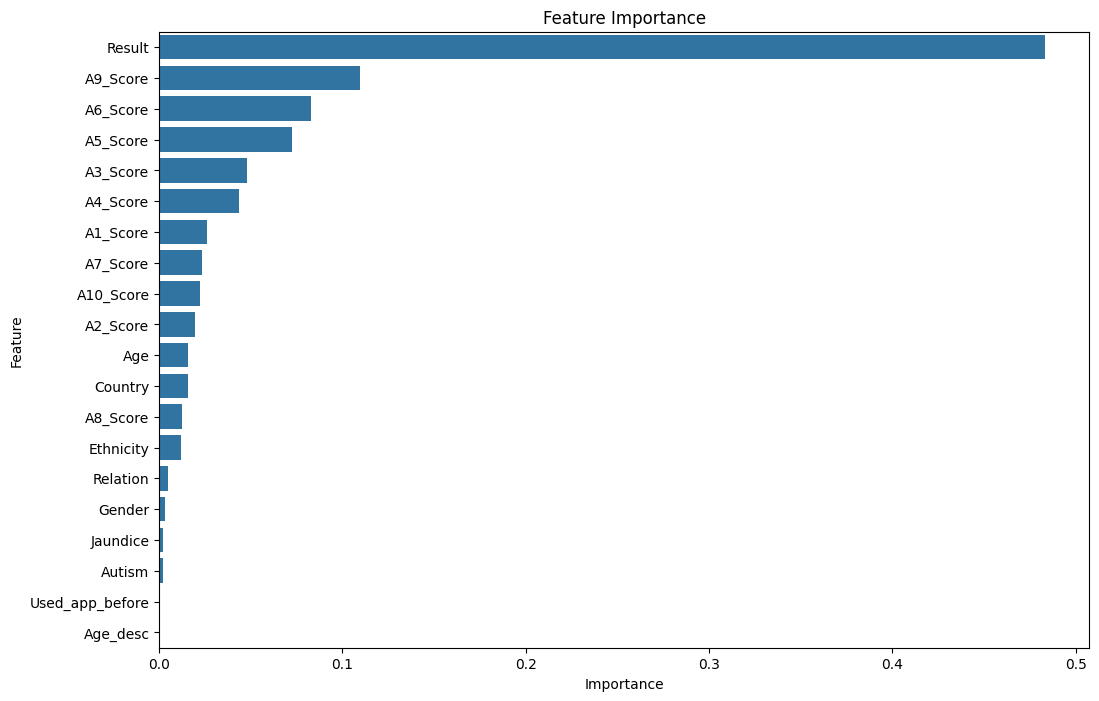

In [ ]:
# Plot the feature importances
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'best_model.pkl')

# To load the model later
# loaded_model = joblib.load('best_model.pkl')


['best_model.pkl']